<a href="https://colab.research.google.com/github/singhankit24/Student-marks-performance/blob/main/marks_predictaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#load datasets
df=pd.read_csv('synthetic_student_marks.csv')

In [ ]:
df.tail()


,study_hours,student_marks
995,1.824239,11.642274
996,9.255822,89.499376
997,2.231368,22.128493
998,9.552136,93.374851
999,5.014052,46.678415


In [ ]:
df.shape

(1000, 2)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    1000 non-null   float64
 1   student_marks  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [ ]:
df.describe()


,study_hours,student_marks
count,1000.000000,1000.000000
mean,5.412309,54.554945
std,2.629236,26.417272
min,1.041688,0.873014
25%,3.123759,31.203299
50%,5.471266,55.228568
75%,7.698876,76.540995
max,9.997459,100.000000


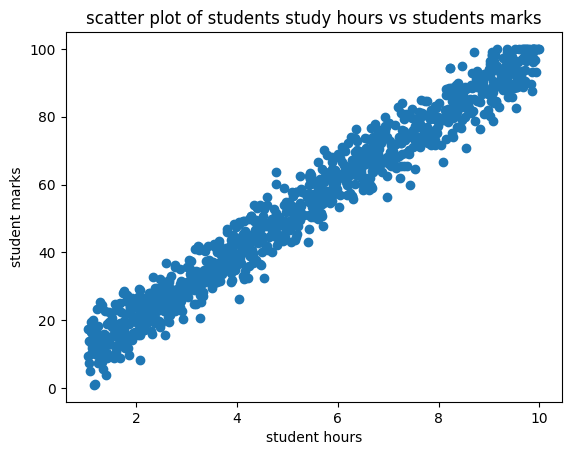

In [ ]:
plt.scatter(x=df['study_hours'],y=df['student_marks'])
plt.xlabel('student hours')
plt.ylabel('student marks')
plt.title('scatter plot of students study hours vs students marks')
plt.show()

In [ ]:
df.isnull()


,study_hours,student_marks
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
995,False,False
996,False,False
997,False,False
998,False,False


In [ ]:
df.isnull().sum()


,0
study_hours,0
student_marks,0


In [ ]:
df.mean()


,0
study_hours,5.412309
student_marks,54.554945


In [ ]:
df2=df.fillna(df.mean())


In [ ]:
df2.isnull().sum()


,0
study_hours,0
student_marks,0


In [ ]:
df2.head()


,study_hours,student_marks
0,4.370861,44.597116
1,9.556429,88.887566
2,7.587945,77.780444
3,6.387926,66.932192
4,2.404168,26.840630


In [ ]:
df2.tail()


,study_hours,student_marks
995,1.824239,11.642274
996,9.255822,89.499376
997,2.231368,22.128493
998,9.552136,93.374851
999,5.014052,46.678415


In [ ]:
x=df2.drop('student_marks',axis=1)
y=df2['student_marks']

In [ ]:
print(x.shape)
print(y.shape)

(1000, 1)
(1000,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)
print('shape of x_train=',x_train.shape)
print('shape of y_train=',y_train.shape)
print('shape of x_test=',x_test.shape)
print('shape of y_test=',y_test.shape)

shape of x_train= (800, 1)
shape of y_train= (800,)
shape of x_test= (200, 1)
shape of y_test= (200,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Build and train the Random Forest model
rf = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
rf.fit(x_train, y_train)

# Predict
y_pred = rf.predict(x_test)

# Accuracy
accuracy = r2_score(y_test, y_pred)
print(f"Random Forest Accuracy (R² Score): {accuracy:.2f}")

# Save model
import joblib
joblib.dump(rf, 'student_marks_predictor_model.pkl')

# Load and test model
model = joblib.load('student_marks_predictor_model.pkl')
print("Prediction for 5 study hours:", model.predict([[5]])[0])

Random Forest Accuracy (R² Score): 0.95
Prediction for 5 study hours: 49.4937747661779


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
rf.fit(x_train,y_train)


RandomForestRegressor(max_depth=10, n_estimators=300, random_state=42)

In [ ]:
rf.feature_importances_


array([1.])

In [ ]:
rf.score(x_test,y_test)


0.9538754303317628

In [ ]:
rf.predict([[4]])[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(39.61318163593599)

In [ ]:
y_pred=rf.predict(x_test)


In [ ]:
y_pred

array([28.27720563, 86.78365033, 29.80099119, 93.72152427, 35.37807557,
       56.6168548 , 30.87562009, 90.39052824, 33.80959186, 94.95684251,
       76.4872372 , 93.54035208, 17.16275553, 24.61308091, 12.73051166,
       30.98962866, 63.52538601, 92.16855415, 69.47734284, 94.60077692,
       84.16121885, 93.77815936, 32.15097986, 22.11722663, 13.55054164,
       22.47716301, 14.10855989, 66.41740416, 93.01038711, 63.52178764,
       48.88683251, 71.91079977, 93.025119  , 24.5049954 , 66.75570028,
       59.62550116, 48.81872227, 37.77888109, 89.17330476, 89.18732015,
       92.37420342, 93.17099026, 30.48382861, 27.48025777, 92.16781202,
       18.63917275, 97.83978038, 64.42127274, 69.80768898, 29.45617571,
       63.6667929 , 54.93420193, 76.29559608, 19.28903308, 70.9902336 ,
       42.28215904, 94.85660715, 63.86913058, 49.73532602, 92.56906739,
       47.0623403 , 91.83257998, 24.23465125, 86.67988496, 74.83920169,
       33.55007855, 14.23798413, 50.76778152, 34.31652983, 57.90

In [ ]:
y_test

,student_marks
833,25.485643
551,92.790144
782,20.540714
535,88.469735
144,41.610878
...,...
975,40.472057
971,97.704053
366,91.025775
479,56.799961


In [ ]:
rf.score(x_test,y_test)


0.9538754303317628

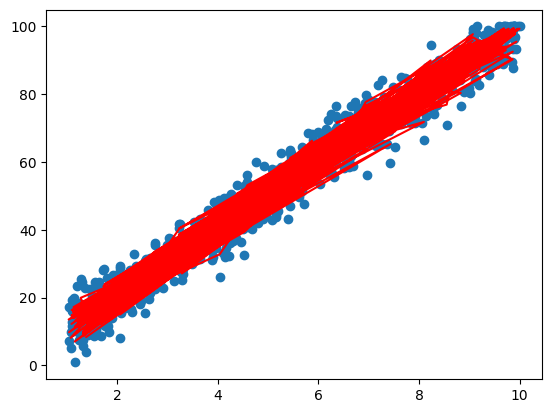

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train,rf.predict(x_train),color='r')

In [ ]:
from sklearn.metrics import r2_score

# Calculate accuracy (R² Score)
accuracy = r2_score(y_test, y_pred)
print(f"Model Accuracy (R² Score): {accuracy:.2f}")

Model Accuracy (R² Score): 0.95


In [ ]:
import joblib
joblib.dump(rf,'student_marks_predictor_model.pkl')

['student_marks_predictor_model.pkl']

In [ ]:
model=joblib.load('student_marks_predictor_model.pkl')

In [ ]:
model.predict([[5]])[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(49.4937747661779)

In [ ]:
# Calculate accuracy
accuracy = r2_score(y_test, y_pred)
print("✅ Model Accuracy (R² Score):", round(accuracy * 100, 2), "%")

✅ Model Accuracy (R² Score): 95.39 %


In [40]:
import gradio as gr
import joblib
import pandas as pd

# Prediction function
def predict_marks(study_hours):
    model = joblib.load('student_marks_predictor_model.pkl')
    data = pd.DataFrame({'study_hours': [float(study_hours)]})
    prediction = model.predict(data)
    return round(prediction[0], 2)

# Custom CSS for background and styling
custom_css = """
body {
    background-color: #e0f7fa;  /* light cyan */
}
"""

# Gradio Interface
ui = gr.Interface(
    fn=predict_marks,
    inputs=gr.Number(label="📘 Enter Study Hours"),
    outputs=gr.Textbox(label="🎯 Predicted Marks"),
    title="📚 Student Marks Predictor",
    description="Enter the number of hours studied and get the predicted marks using Random Forest Model.",
    examples=[[5.0], [8.5], [3.2]],
    css=custom_css  # Inject custom background color
)

ui.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5abbf43e569c419f3d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
